In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project-20241118T202117Z-001/Project/WHO_Suicide_MissingHDIFixed.csv')
df=df.iloc[:,1:]
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,MissingHDI
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X,0.0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent,0.0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.619,"2,156,624,900",796,Generation X,0.0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.619,"2,156,624,900",796,G.I. Generation,0.0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.619,"2,156,624,900",796,Boomers,0.0


In [ ]:
hdi = pd.read_excel('/content/drive/MyDrive/Project-20241118T202117Z-001/Project/hdr-data(ALL HDI DATA).xlsx')
hdi = hdi[['country', 'indicator', 'year', 'value']]
hdi = hdi.pivot(index=['country', 'year'], columns='indicator', values='value')
hdi.reset_index(inplace=True)
hdi.head()

indicator,country,year,Expected Years of Schooling (years),Gross National Income Per Capita (2017 PPP$),HDI Rank,Human Development Index (value),Life Expectancy at Birth (years),Mean Years of Schooling (years)
0,Afghanistan,1990,2.936,3115.670,NaN,0.284,45.967,0.872
1,Afghanistan,1991,3.228,2817.305,NaN,0.292,46.663,0.915
2,Afghanistan,1992,3.520,2474.682,NaN,0.299,47.596,0.959
3,Afghanistan,1993,3.812,1723.020,NaN,0.307,51.466,1.002
4,Afghanistan,1994,4.104,1202.010,NaN,0.300,51.495,1.045


In [ ]:
land = pd.read_csv('/content/drive/MyDrive/Project-20241118T202117Z-001/Project/arable-land-by-country-2024.csv')
land = land[['country', 'arableLandByCountry2021_hectares']]
land.head()

,country,arableLandByCountry2021_hectares
0,India,154447948.0
1,China,108862000.0
2,United States,157736800.0
3,Indonesia,26300000.0
4,Pakistan,30510000.0


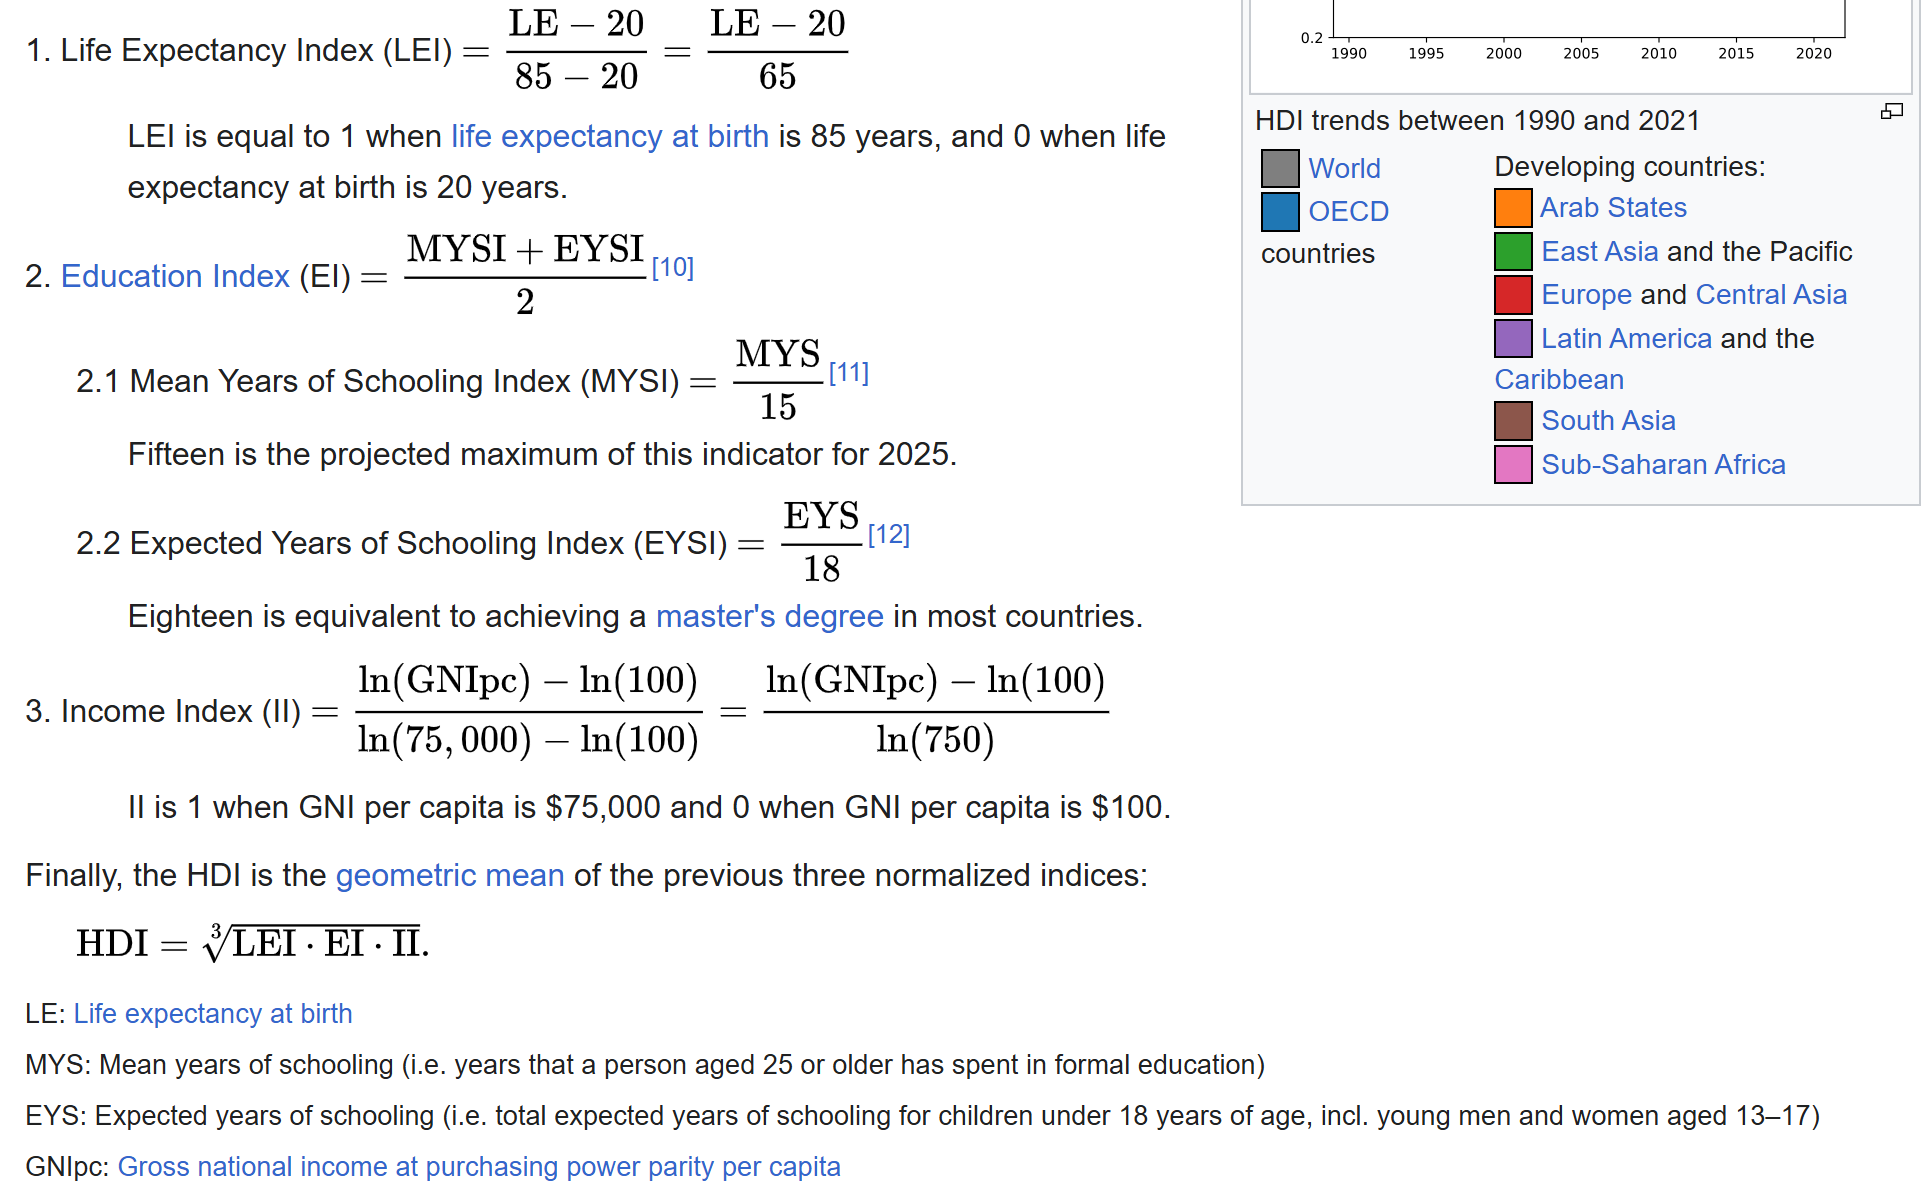

In [ ]:
combined = pd.merge(df, hdi, how='left', on=['country', 'year'])
combined = combined[~combined['Human Development Index (value)'].isna()]
combined = combined.drop(columns=['HDI Rank', 'HDI for year'])
df = combined.rename(columns={'Human Development Index (value)':'HDI for year'})
df = pd.merge(df, land, how='left', on=['country'])
pop_density = df['population'] / df['arableLandByCountry2021_hectares']
df['Population Density'] = pop_density
df = df.dropna(axis=0,ignore_index=True)


In [ ]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(int)
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),MissingHDI,Expected Years of Schooling (years),Gross National Income Per Capita (2017 PPP$),HDI for year,Life Expectancy at Birth (years),Mean Years of Schooling (years),arableLandByCountry2021_hectares,Population Density
count,21930.000000,21930.000000,2.193000e+04,21930.000000,2.193000e+04,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,2.193000e+04,21930.000000
mean,2003.374555,209.625445,1.843949e+06,12.714812,5.034718e+11,19019.901778,0.003192,14.104435,26461.856548,0.780168,74.751063,9.670415,8.158266e+06,8.565617
std,7.173610,679.338546,3.924222e+06,18.465780,1.599507e+12,20318.559255,0.056409,2.398837,19492.930650,0.096666,4.892223,2.262859,2.117946e+07,64.939410
min,1990.000000,0.000000,2.780000e+02,0.000000,6.310127e+07,251.000000,0.000000,6.900000,1822.276000,0.490000,53.980000,3.193000,1.500000e+02,0.002511
25%,1998.000000,3.000000,1.225590e+05,1.100000,1.190553e+10,3984.000000,0.000000,12.269000,11111.073000,0.705000,71.373000,8.012000,2.430000e+05,0.167614
50%,2004.000000,28.000000,4.680020e+05,6.030000,5.656548e+10,11273.000000,0.000000,14.040000,20682.693000,0.785000,75.458000,10.030000,1.319765e+06,0.399432
75%,2009.000000,132.000000,1.511178e+06,16.440000,2.835230e+11,28722.000000,0.000000,15.819000,38757.374000,0.864000,78.464000,11.378000,5.590000e+06,1.060933
max,2016.000000,11767.000000,4.380521e+07,204.920000,1.812071e+13,126352.000000,1.000000,23.248000,109543.075000,0.952000,83.893000,14.082000,1.577368e+08,1130.178571


In [ ]:
df['generation'].unique()

array(['Boomers', 'Generation X', 'Silent', 'Millenials',
       'G.I. Generation', 'Generation Z'], dtype=object)

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,MissingHDI,Expected Years of Schooling (years),Gross National Income Per Capita (2017 PPP$),HDI for year,Life Expectancy at Birth (years),Mean Years of Schooling (years),arableLandByCountry2021_hectares,Population Density
0,Albania,1992,male,35-54 years,12,343800,3.49,Albania1992,709452584,251,Boomers,0.0,10.658,3177.137,0.616,73.715,7.351,599900.0,0.573096
1,Albania,1992,male,15-24 years,9,263700,3.41,Albania1992,709452584,251,Generation X,0.0,10.658,3177.137,0.616,73.715,7.351,599900.0,0.439573
2,Albania,1992,male,55-74 years,5,159500,3.13,Albania1992,709452584,251,Silent,0.0,10.658,3177.137,0.616,73.715,7.351,599900.0,0.265878
3,Albania,1992,male,25-34 years,7,245500,2.85,Albania1992,709452584,251,Boomers,0.0,10.658,3177.137,0.616,73.715,7.351,599900.0,0.409235
4,Albania,1992,female,15-24 years,7,292400,2.39,Albania1992,709452584,251,Generation X,0.0,10.658,3177.137,0.616,73.715,7.351,599900.0,0.487415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,63067077179,2309,Generation X,0.0,11.694,6272.909,0.698,70.234,11.343,4016100.0,0.901579
21926,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,63067077179,2309,Silent,0.0,11.694,6272.909,0.698,70.234,11.343,4016100.0,0.086767
21927,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,63067077179,2309,Generation Z,0.0,11.694,6272.909,0.698,70.234,11.343,4016100.0,0.687771
21928,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,63067077179,2309,Generation Z,0.0,11.694,6272.909,0.698,70.234,11.343,4016100.0,0.655263


In [ ]:
# One-hot encoding for categorical variables
label_encoder = LabelEncoder()
age_map = {'5-14 years':0,'15-24 years':1, '25-34 years	':2,\
           '35-54 years': 3, '55-74 years':4, '75+ years':5}
generation_map = {'G.I. Generation':0,'Silent':1,'Boomers':2,\
                  'Generation X':3, 'Millenials':4,'Generation Z':5}
df['sex_onehot'] = label_encoder.fit_transform(df['sex'])
df['generation_onehot'] = df['generation'].map(generation_map)

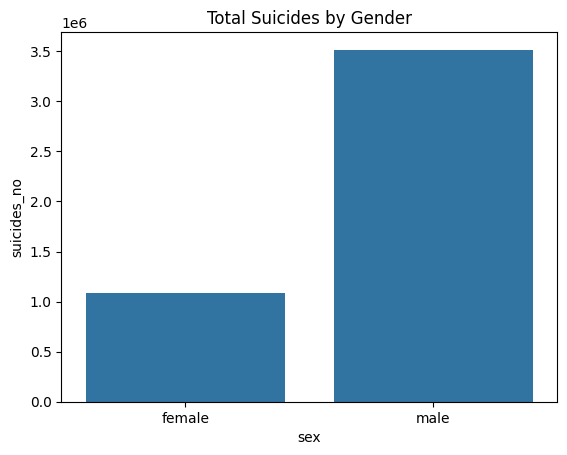

In [ ]:
df_gender = df.groupby('sex')['suicides_no'].sum().reset_index()
sns.barplot(x='sex', y='suicides_no', data=df_gender)
plt.title('Total Suicides by Gender')
plt.show()

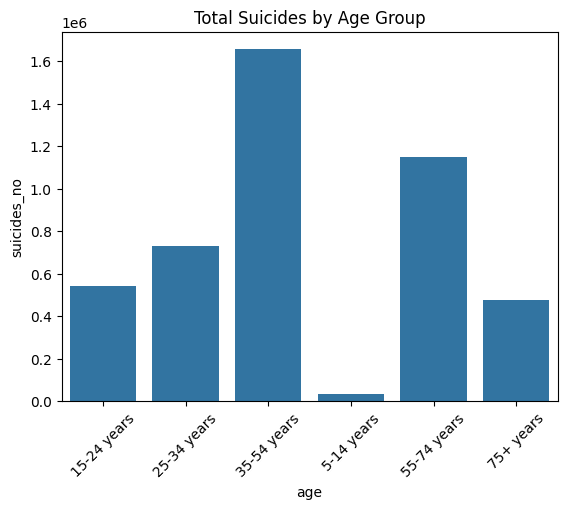

In [ ]:
df_age = df.groupby('age')['suicides_no'].sum().reset_index()
sns.barplot(x='age', y='suicides_no', data=df_age)
plt.title('Total Suicides by Age Group')
plt.xticks(rotation=45)
plt.show()

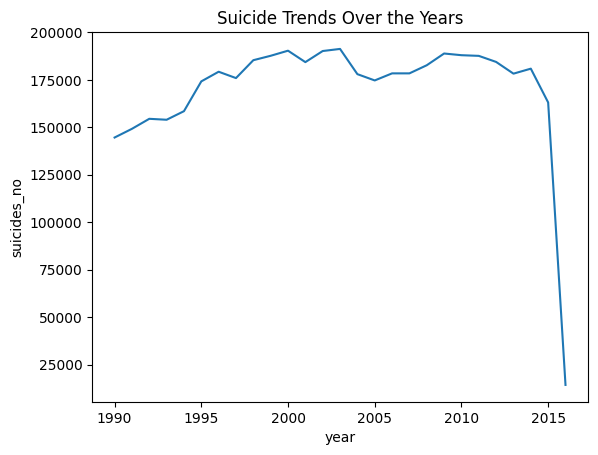

In [ ]:
df_year = df.groupby('year')['suicides_no'].sum().reset_index()
sns.lineplot(x='year', y='suicides_no', data=df_year)
plt.title('Suicide Trends Over the Years')
plt.show()

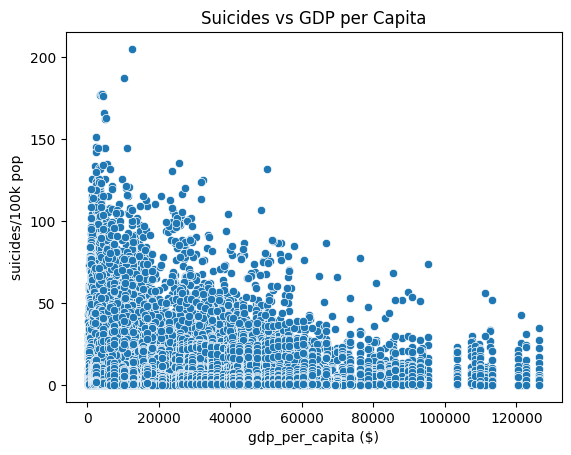

In [ ]:
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df)
plt.title('Suicides vs GDP per Capita')
plt.show()

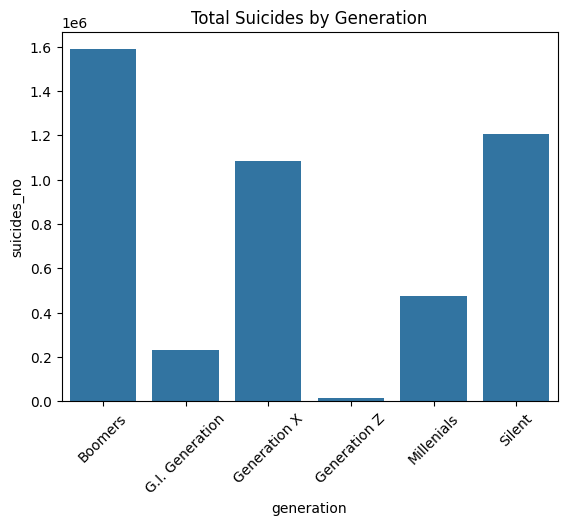

In [ ]:
df_generation = df.groupby('generation')['suicides_no'].sum().reset_index()
sns.barplot(x='generation', y='suicides_no', data=df_generation)
plt.title('Total Suicides by Generation')
plt.xticks(rotation=45)
plt.show()

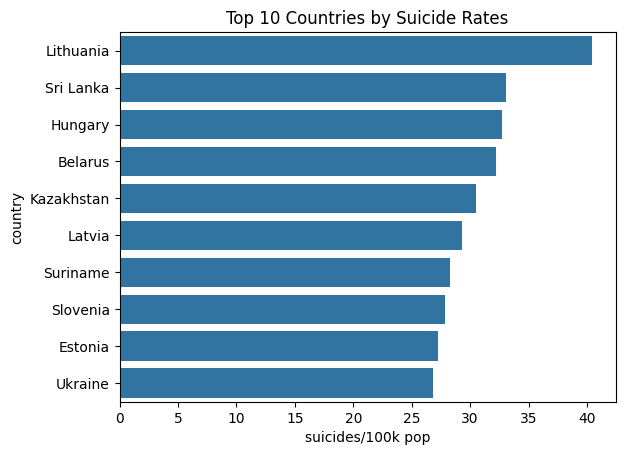

In [ ]:
df_country = df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop', ascending=False)
top_10_countries = df_country.head(10)
sns.barplot(x='suicides/100k pop', y='country', data=top_10_countries)
plt.title('Top 10 Countries by Suicide Rates')
plt.show()

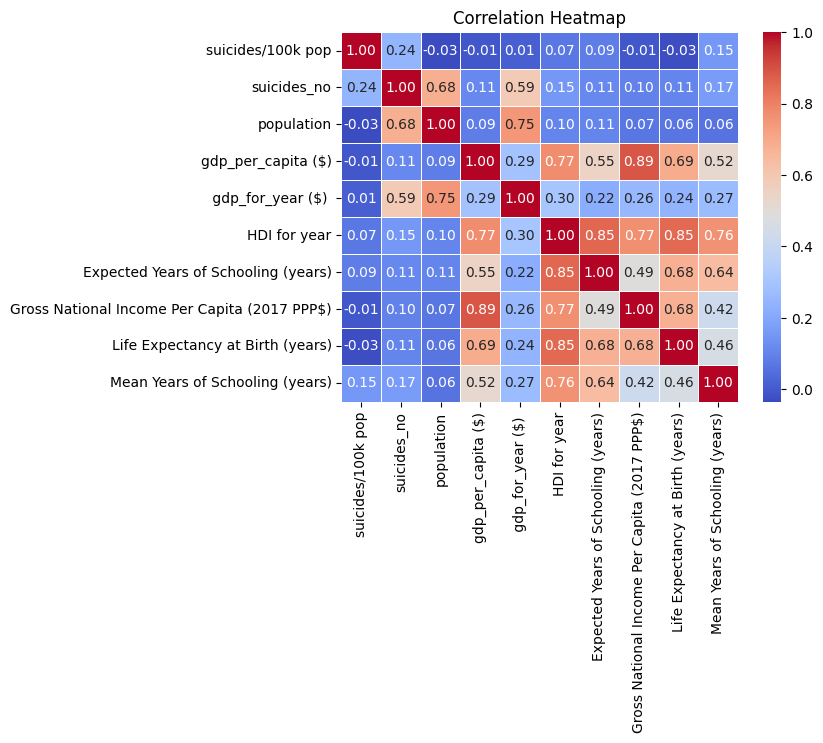

In [ ]:
corr = df[['suicides/100k pop','suicides_no', 'population', 'gdp_per_capita ($)', ' gdp_for_year ($) ', 'HDI for year', 'Expected Years of Schooling (years)',
       'Gross National Income Per Capita (2017 PPP$)', 'Life Expectancy at Birth (years)',
       'Mean Years of Schooling (years)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Regression Tree 1

In [ ]:
X = df[['year', 'sex_onehot',  'Population Density', 'Expected Years of Schooling (years)',
        'Life Expectancy at Birth (years)', ' gdp_for_year ($) ', 'generation_onehot']]
y = df['suicides_no']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 35353.55791153671
R-squared: 0.928639012322399


                               Feature  Importance
5                    gdp_for_year ($)     0.415769
2                   Population Density    0.204694
6                    generation_onehot    0.130258
1                           sex_onehot    0.125632
4     Life Expectancy at Birth (years)    0.087886
0                                 year    0.018578
3  Expected Years of Schooling (years)    0.017184


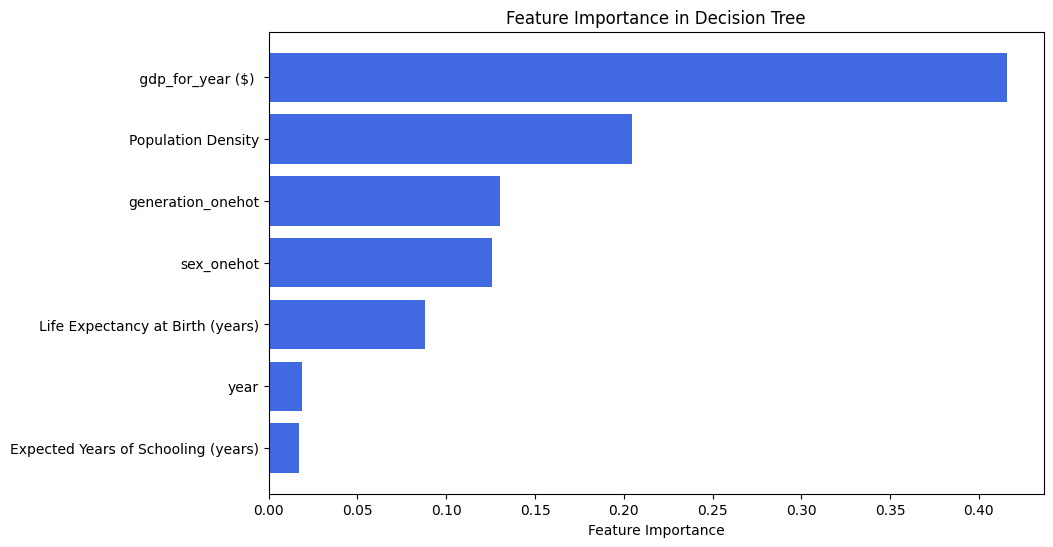

In [ ]:
# Get the feature importance values
feature_importance = tree_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

## Regression Tree 2

In [ ]:
# Normalized Model
X = df[['year', 'sex_onehot',  'Population Density', 'Expected Years of Schooling (years)',
        'Life Expectancy at Birth (years)', ' gdp_for_year ($) ', 'generation_onehot']]
y = df['suicides/100k pop']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 108.65446475148198
R-squared: 0.6821289248014686


                               Feature  Importance
2                   Population Density    0.207506
6                    generation_onehot    0.186297
1                           sex_onehot    0.159755
5                    gdp_for_year ($)     0.141779
3  Expected Years of Schooling (years)    0.119062
4     Life Expectancy at Birth (years)    0.115910
0                                 year    0.069692


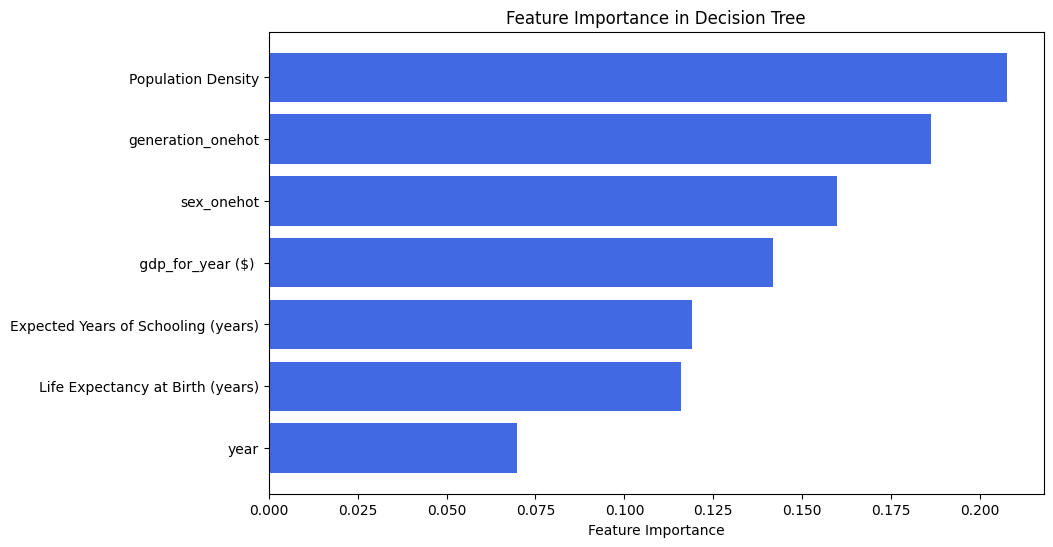

In [ ]:
# Get the feature importance values
feature_importance = tree_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

## Random Forest 1

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

X = df[['year', 'sex_onehot',  'Population Density', 'Expected Years of Schooling (years)',
        'Life Expectancy at Birth (years)', ' gdp_for_year ($) ', 'generation_onehot']]
y = df['suicides_no']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 18333.470876835385
R-squared: 0.9629939766570826


                               Feature  Importance
5                    gdp_for_year ($)     0.437681
2                   Population Density    0.179062
6                    generation_onehot    0.144180
1                           sex_onehot    0.128672
4     Life Expectancy at Birth (years)    0.053939
3  Expected Years of Schooling (years)    0.040654
0                                 year    0.015812


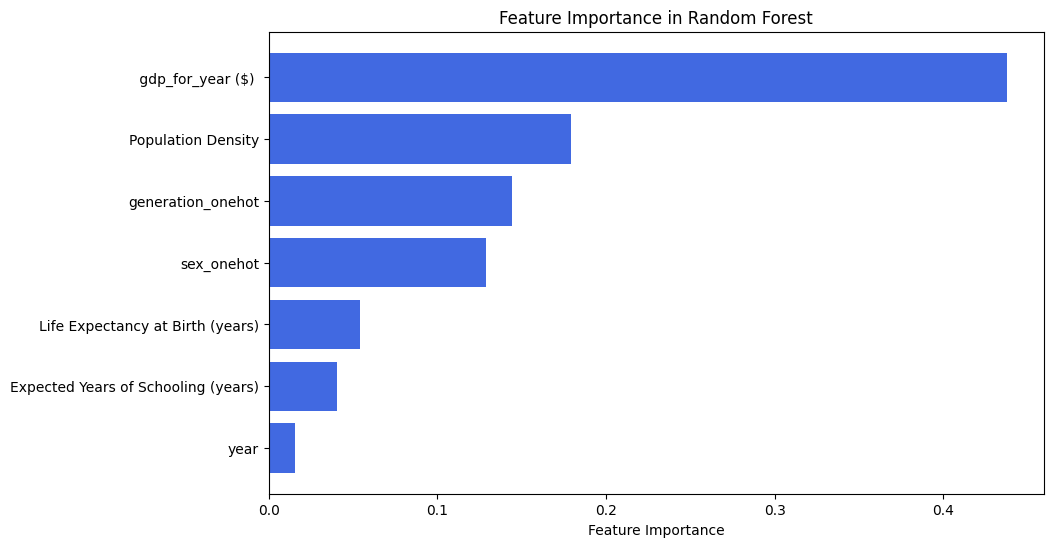

In [ ]:
# Get the feature importance values
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

## Random Forest 2

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Normalized Model
X = df[['year', 'sex_onehot',  'Population Density', 'Expected Years of Schooling (years)',
        'Life Expectancy at Birth (years)', ' gdp_for_year ($) ', 'generation_onehot']]
y = df['suicides/100k pop']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 59.354606113150936
R-squared: 0.8263567677009308


                               Feature  Importance
2                   Population Density    0.201898
6                    generation_onehot    0.180916
1                           sex_onehot    0.159849
5                    gdp_for_year ($)     0.150395
3  Expected Years of Schooling (years)    0.136391
4     Life Expectancy at Birth (years)    0.105452
0                                 year    0.065100


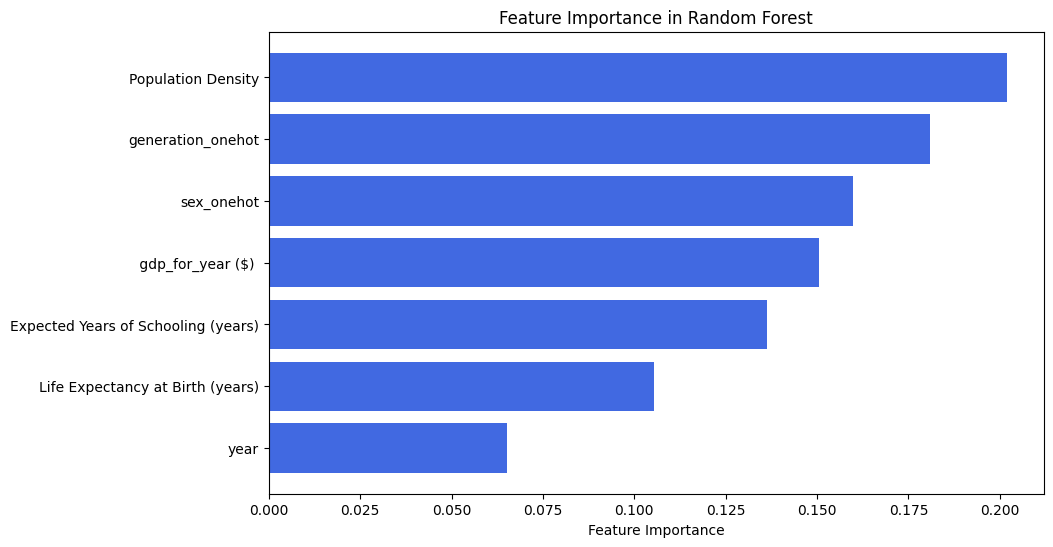

In [ ]:
# Get the feature importance values
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

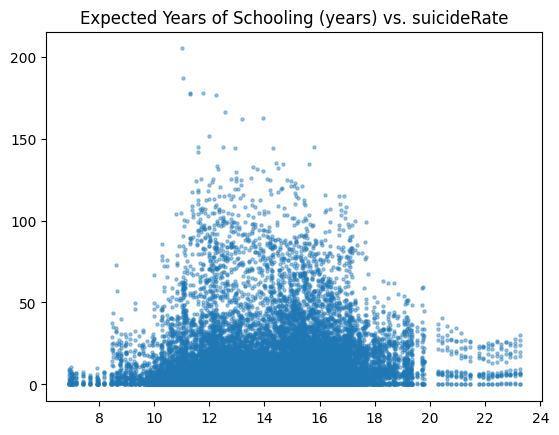

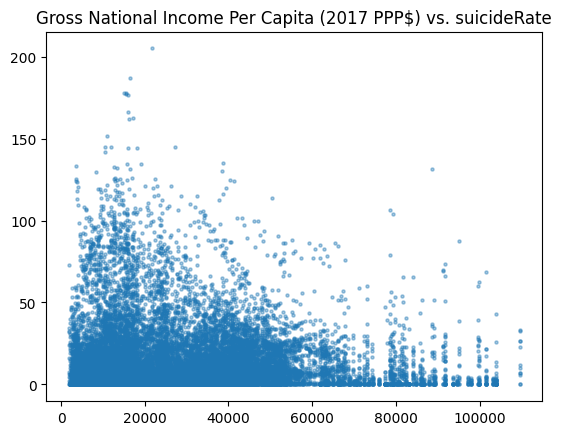

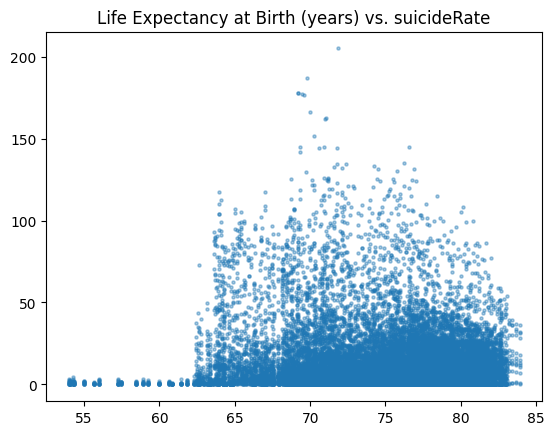

In [ ]:
for key in ['Expected Years of Schooling (years)',
       'Gross National Income Per Capita (2017 PPP$)',
       'Life Expectancy at Birth (years)']:

    y = combined['suicides/100k pop']
    X = combined[key]
    if key == 'HDI for year':
        val_filter = X!=0
        X = X[val_filter]
        y = y[val_filter]
    plt.scatter(X,y,s = 5,alpha = .4)
    plt.title(f'{key} vs. suicideRate')
    plt.show()

In [ ]:
X = df[['year', 'sex_onehot',  'Population Density', 'Expected Years of Schooling (years)',
        'Life Expectancy at Birth (years)', ' gdp_for_year ($) ', 'generation_onehot']]
y = df['suicides/100k pop']
X = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
y_pred = svm_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 195.77383136410953
R-squared: 0.42725926252748225


In [ ]:
from sklearn.svm import LinearSVR
svm_regressor_linear = LinearSVR()
svm_regressor_linear.fit(X_train, y_train)
y_pred = svm_regressor_linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 265.65049699847907
R-squared: 0.22283350894902776


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 230.3305845244598
R-squared: 0.3261627055882427


In [ ]:
ridge.coef_

array([-0.31048899,  7.43636898, -0.27263633,  4.22930336, -2.72398125,
        0.07237019, -6.68880669])

In [ ]:
from sklearn.feature_selection import f_regression
f_statistic, p_values = f_regression(X_train, y_train)

In [ ]:
print(f_statistic)
print(p_values)

[1.27840195e+02 3.33523409e+03 9.61098046e+00 1.18767017e+02
 1.69329473e+01 1.58947198e+00 2.49889106e+03]
[1.53944111e-29 0.00000000e+00 1.93723639e-03 1.44361465e-27
 3.89004500e-05 2.07418357e-01 0.00000000e+00]


In [ ]:
# %%shell
# get path of current notebook
# jupyter nbconvert --to html /content/Project.ipynb